# **Lab Assignment 2**
**Creator**: Lauren Enriquez  
**Date**: September 18, 2019  

**The first command typed in the terminal was:**
> muscle –in seqs.fa –out seqs.aligned.fa

This command produced a multiple sequence alignment from the file "seq.fa", which contained 48 unique sequences.

**The second command typed in the terminal was:**
> fasttree –nt < seqs.aligned.fa > tree.nwk

This command allowed for a Newick-formatted tree to be constructed from the multiple alignment and to assign the name of the file as "tree.nwk". 
***

In [558]:
# Wrappers for supported file formats
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.SeqUtils import GC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This section of code draws the Newick-formatted tree created to the terminal.

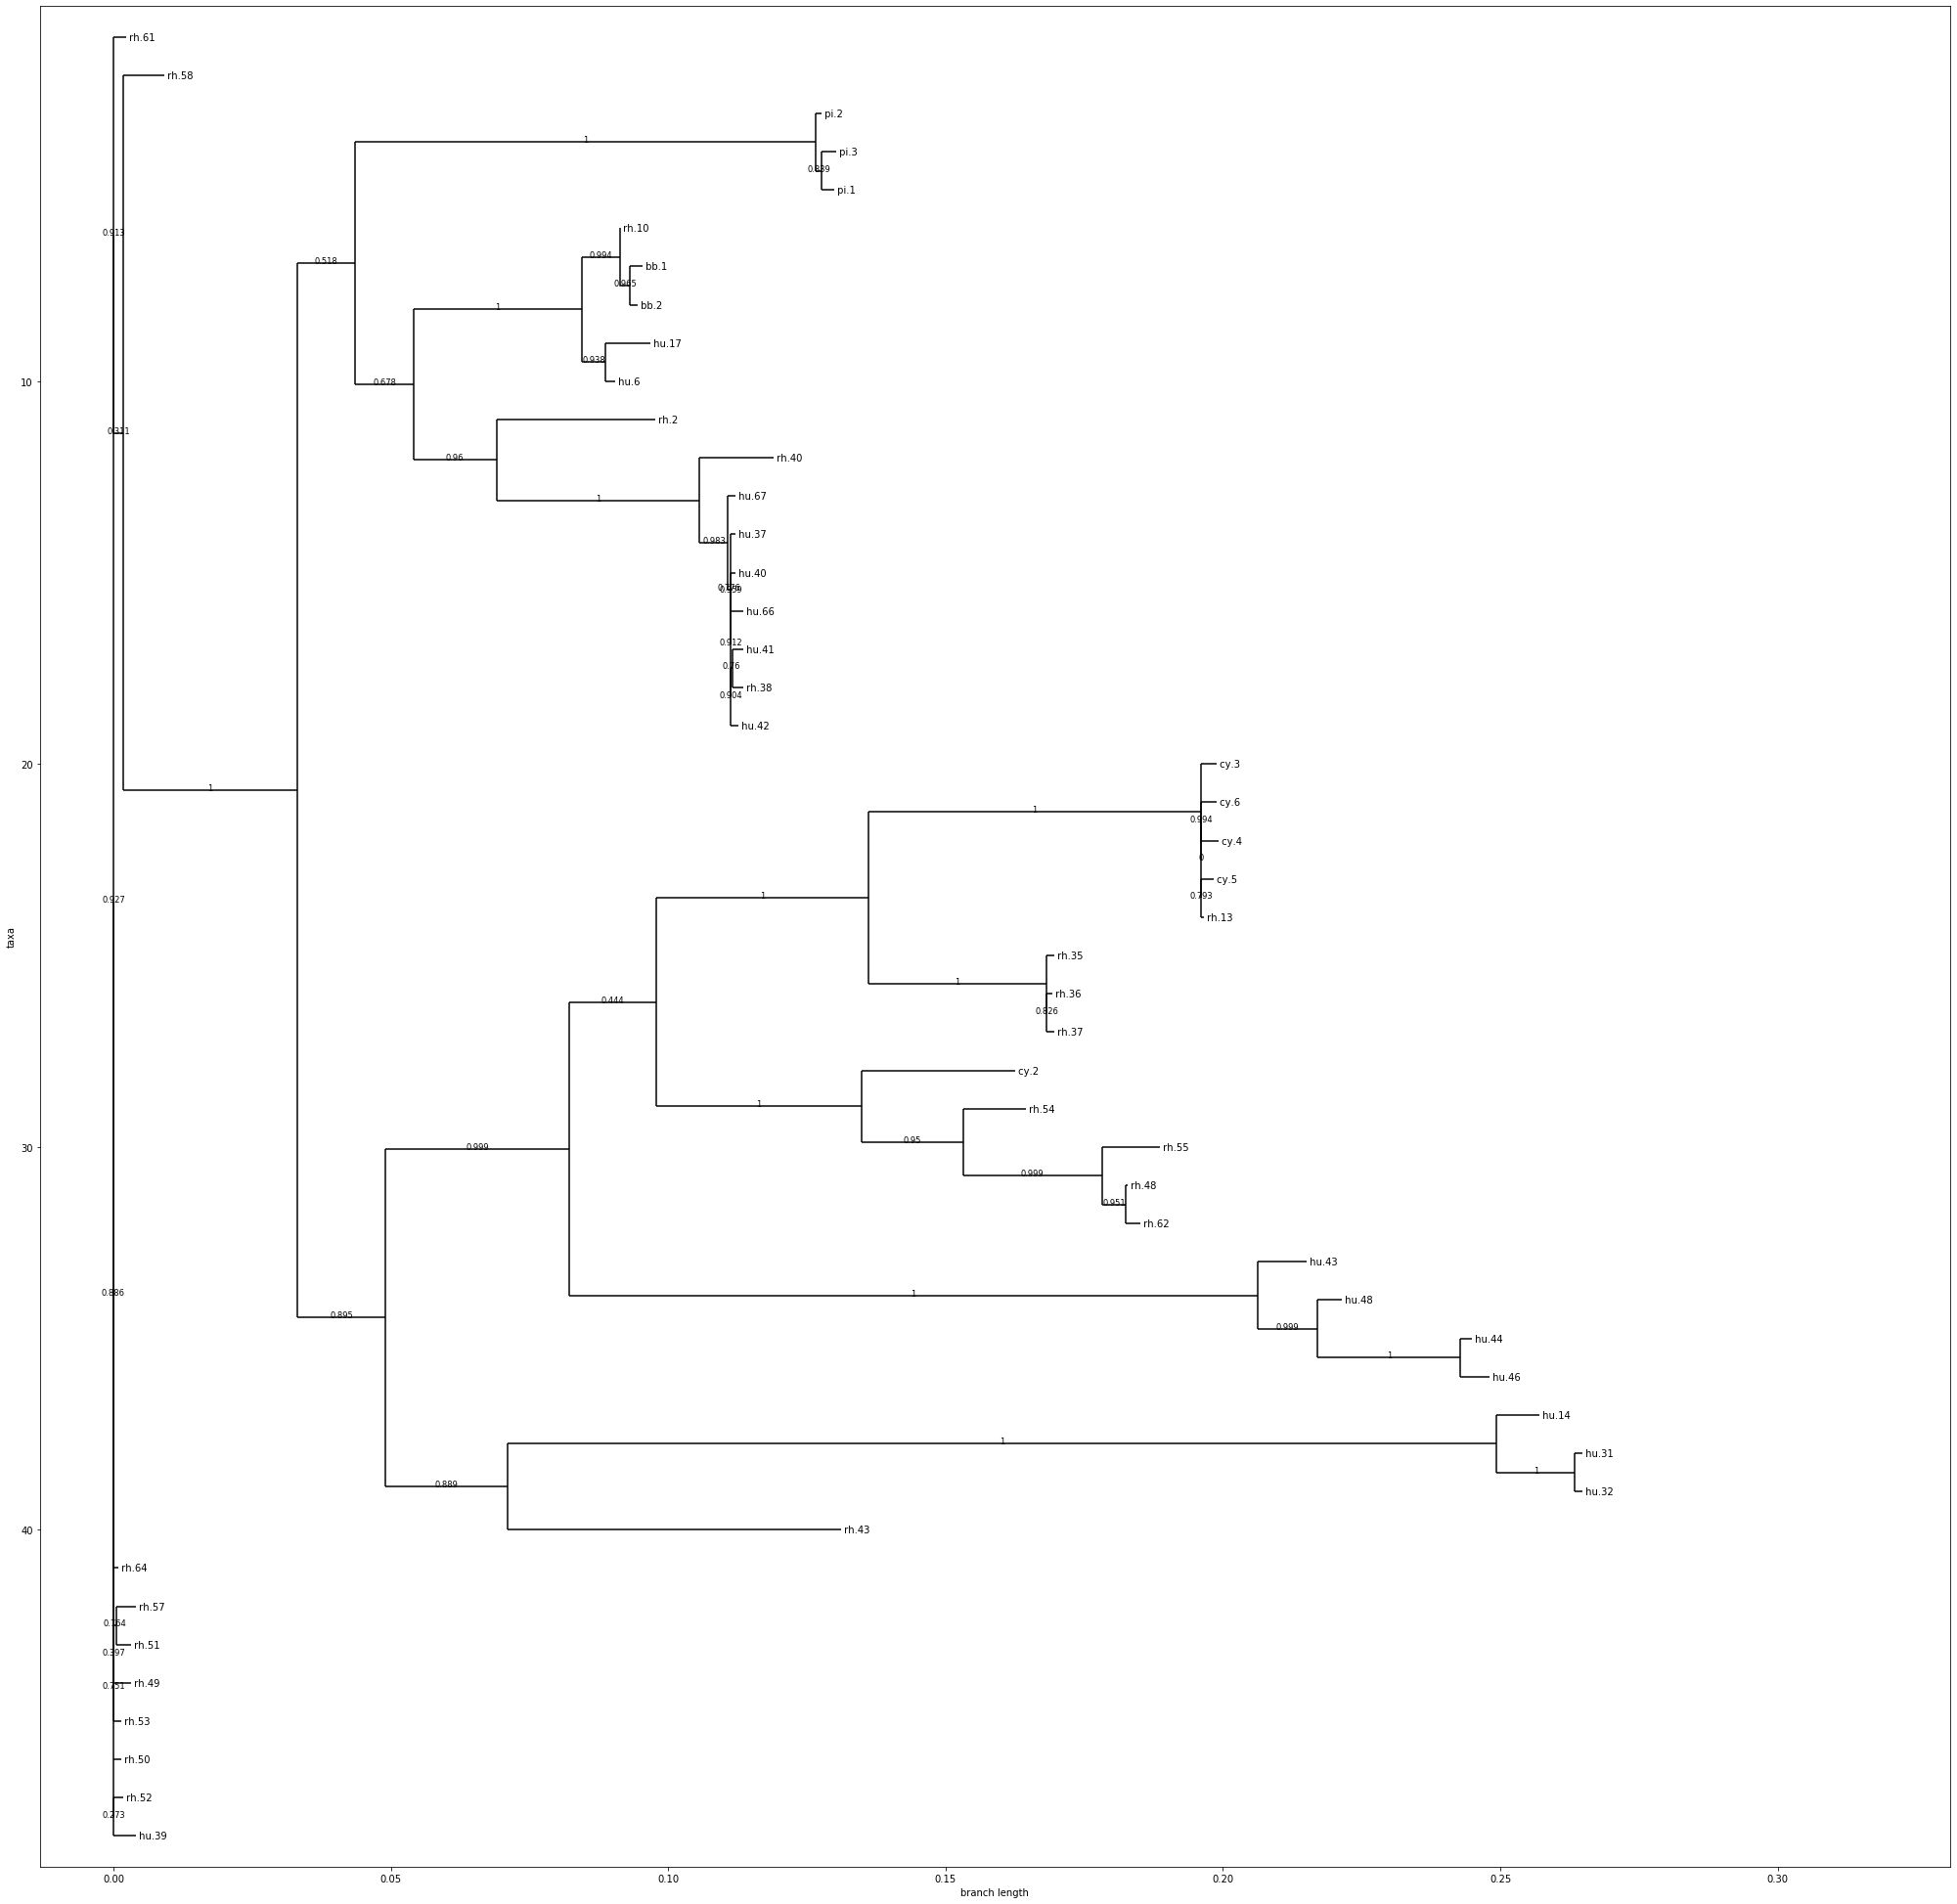

In [542]:
# OUTPUT: Draws a New-formatted tree from the newick file created
plt.rcParams['figure.figsize'] = [35, 35]
tree = Phylo.read('tree.nwk','newick')
Phylo.draw(tree)

In [543]:
# OUTPUT: Draws a New-formatted tree that is easier to visualize the I.D. of the sequences
Phylo.draw_ascii(tree)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

From the tree, we can determine that there are 3 obvious clusters of sequences.  
An example of groups of sequences that seem to be closely related to each other are pi.1, pi.2, and pi.3 since they are close to each other in the tree.  
Sequences that seem far more distantly related to one another are rh.58 and cy.5.

***
The section of code below records the sequences for each cluster. This information is stored in the dictionary "cluster_map". This section will then print the sequence I.D. and it's sequence length to the terminal.

In [559]:
# PROCESSING: Organize clusters with the correct sequence information
record_dict = SeqIO.to_dict(SeqIO.parse("seqs.fa", "fasta"))
cluster_map = {1: [record_dict["rh.61"],record_dict["rh.58"], record_dict["rh.64"], record_dict["rh.57"],
                   record_dict["rh.51"], record_dict["rh.49"], record_dict["rh.53"], record_dict["rh.50"],
                   record_dict["rh.52"], record_dict["hu.39"]],
               2: [record_dict["pi.2"],record_dict["pi.3"], record_dict["pi.1"], record_dict["rh.10"],
                   record_dict["bb.1"], record_dict["bb.2"], record_dict["hu.17"], record_dict["hu.6"],
                   record_dict["rh.2"], record_dict["rh.40"],record_dict["hu.67"], record_dict["hu.37"],
                   record_dict["hu.40"], record_dict["hu.66"], record_dict["hu.41"], record_dict["rh.38"],
                   record_dict["hu.42"]],
               3: [record_dict["cy.3"],record_dict["cy.6"], record_dict["cy.4"], record_dict["cy.5"],
                   record_dict["rh.13"], record_dict["rh.35"], record_dict["rh.36"], record_dict["rh.37"],
                   record_dict["cy.2"], record_dict["rh.54"],record_dict["rh.55"], record_dict["rh.48"],
                   record_dict["rh.62"], record_dict["hu.43"], record_dict["hu.48"], record_dict["hu.44"],
                   record_dict["hu.46"], record_dict["hu.14"],record_dict["hu.31"], record_dict["hu.32"],
                   record_dict["rh.43"]]}
          
# OUTPUT: Displays each sequence I.D. and sequence length for each Cluster
print("Cluster 1")
for record in cluster_map[1]:
    print(record.id, len(record.seq))
                   
print("\nCluster 2")
for record in cluster_map[2]:
    print(record.id, len(record.seq))

print("\nCluster 3")
for record in cluster_map[3]:
    print(record.id, len(record.seq))

Cluster 1
rh.61 2217
rh.58 2217
rh.64 2217
rh.57 2217
rh.51 2217
rh.49 2217
rh.53 2217
rh.50 2217
rh.52 2217
hu.39 2217

Cluster 2
pi.2 2196
pi.3 2196
pi.1 2196
rh.10 2217
bb.1 2217
bb.2 2217
hu.17 2217
hu.6 2217
rh.2 2217
rh.40 2217
hu.67 2217
hu.37 2217
hu.40 2217
hu.66 2217
hu.41 2217
rh.38 2217
hu.42 2217

Cluster 3
cy.3 2187
cy.6 2187
cy.4 2187
cy.5 2187
rh.13 2187
rh.35 2190
rh.36 2190
rh.37 2190
cy.2 2214
rh.54 2214
rh.55 2214
rh.48 2214
rh.62 2214
hu.43 2214
hu.48 2211
hu.44 2211
hu.46 2211
hu.14 2211
hu.31 2211
hu.32 2211
rh.43 2211


***
This section of code prints the I.D and FASTA Sequence for a represenative of each cluster to the terminal.
The sequences were identified by using https://blast.ncbi.nlm.nih.gov/Blast.cgi to BLAST each representative against the nr/nt default parameters.

In [545]:
# OUTPUT: Displays the I.D. and FASTA Sequence of a specimen in each cluster
print ("\nI.D. and FASTA Sequences \n")
print("Cluster 1:",cluster_map[1][0].id, "\nSequence Length = ",len(cluster_map[1][0].seq),"\n",cluster_map[1][0].seq)
print (" ")
print("Cluster 2:",cluster_map[2][6].id,"\nSequence Length = ",len(cluster_map[2][6].seq),"\n",cluster_map[2][6].seq)
print (" ")
print("Cluster 3:",cluster_map[3][3].id,"\nSequence Length = ",len(cluster_map[3][3].seq),"\n",cluster_map[3][3].seq)


I.D. and FASTA Sequences 

Cluster 1: rh.61 
Sequence Length =  2217 
 atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagccccgaaacccaaggccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataatcacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccgtcaccacagcgttcccccgactcctccacgggcatcggcaagaaaggccagcagcccgccagaaagagactcaatttcggtcagactggcgactcagagtcagtccccgaccctcaacctatcggagaacctccagcagcgccctctagtgtgggatctggtacaatggctgcaggcggtggcgcaccaatggcagacaataacgaaggtgccgacggagtgggtagttcctcgggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctgcccacctacaacaaccacctctacaagcaaatctccaacgggacctcgggaggcagcaccaacgacaacacctactttggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgacccatcaacaacaactggggattcc

***
**CLUSTER 1: rh.61**<br>
Sequence Length = 2217 <br>
**Most Common Matches:** <br>
Adeno-associated virus isolate rh.61 capsid protein VP1 (cap) gene, complete cds (100% match)<br>
Adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds (99.73% match)<br>
Non-human primate Adeno-associated virus isolate AAVrh.10 capsid protein (VP1) gene, complete cds (92.74% match)<br><br>
Matches the most with rh capsid protein VP1 genes
***            
**CLUSTER 2: hu.17** <br>
Sequence Length = 2217<br>
**Most Common Matches:**<br>
Adeno-associated virus isolate hu.17 capsid protein VP1 (cap) gene, complete cds (100% match)<br>
Adeno-associated virus isolate rh.25 capsid protein VP1 (cap) gene, complete cds (99.10% match)<br>
Non-human primate Adeno-associated virus isolate AAVrh.10 capsid protein (VP1) gene, complete cds (98.24% match)<br><br>
Matches the most with hu and rh capsid protein VP1 genes
***
**CLUSTER 3: cy.5** <br>
Sequence Length = 2187<br>
**Most Common Matches:**<br>
Non-human primate Adeno-associated virus isolate AAVcy.5 capsid protein (VP1) gene, complete cds (100% match)<br>
Adeno-associated virus isolate cy.1R1 capsid protein VP1 gene, partial cds (99.95% match)<br>
Adeno-associated virus isolate cy.5R4 capsid protein VP1 gene, partial cds (99.77% match)<br><br>
Matches the most with cy capsid protein VP1 genes
***
**GENERAL NOTES** <br>
All of the specimens are decended from the **Adeno-associated virus**, which can infect humans and other primate species. They are all single stranded DNA viruses and each sequence from each specimen are coding sequences for the **capside protein VP1 gene (full or partial)**. All the specimens are from the subfamily, **Parvoviridae**, and the genus, **Dependoparvovirus**.<br> <br>
From the 3 clusters identified for this lab, it cannot be determined that any of the representatives did not necessarily match the others. We should do not completely trust annotations from BLAST sequences due to partial homologies in large sequences. This would cause high E-values and frequent identity matches with other genes.

***
This section of code records the aligned sequences for each cluster. This information is stored in the dictionary "align_map".

In [547]:
# PROCESSING: Organize clusters with the correct aligned sequence information
record_dict2 = SeqIO.to_dict(SeqIO.parse("seqs.aligned.fa", "fasta"))
align_map = {1: [record_dict2["rh.61"],record_dict2["rh.58"], record_dict2["rh.64"], record_dict2["rh.57"],
                 record_dict2["rh.51"], record_dict2["rh.49"], record_dict2["rh.53"], record_dict2["rh.50"],
                 record_dict2["rh.52"], record_dict2["hu.39"]],
             2: [record_dict2["pi.2"],record_dict2["pi.3"], record_dict2["pi.1"], record_dict2["rh.10"],
                 record_dict2["bb.1"], record_dict2["bb.2"], record_dict2["hu.17"], record_dict2["hu.6"],
                 record_dict2["rh.2"], record_dict2["rh.40"],record_dict2["hu.67"], record_dict2["hu.37"],
                 record_dict2["hu.40"], record_dict2["hu.66"], record_dict2["hu.41"], record_dict2["rh.38"],
                 record_dict2["hu.42"]],
             3: [record_dict2["cy.3"],record_dict2["cy.6"], record_dict2["cy.4"], record_dict2["cy.5"],
                 record_dict2["rh.13"], record_dict2["rh.35"], record_dict2["rh.36"], record_dict2["rh.37"],
                 record_dict2["cy.2"], record_dict2["rh.54"],record_dict2["rh.55"], record_dict2["rh.48"],
                 record_dict2["rh.62"], record_dict2["hu.43"], record_dict2["hu.48"], record_dict2["hu.44"],
                 record_dict2["hu.46"], record_dict2["hu.14"],record_dict2["hu.31"], record_dict2["hu.32"],
                 record_dict2["rh.43"]]}


***
This section of code determines whether a given position in the sequences is skewed toward GC (for each cluster) based off the percentage generated from the function "GC". The function "GC" is from the package Bio.SeqUtils and calculates the G+C content.

In [561]:
# PROCESSING: Calculates the G+C content for each position in Cluster 1
cluster1_GC = []
for i in range (len(align_map[1][1].seq)):
    sum = 0
    for x in align_map[1]:
        sum = sum + (GC(x.seq[i])/100)
    avg = sum / len(align_map[1])
    cluster1_GC.append(avg)

# PROCESSING: Calculates the G+C content for each position in Cluster 2
cluster2_GC = []
for i in range (len(align_map[2][1].seq)):
    sum = 0
    for x in align_map[1]:
        sum = sum + (GC(x.seq[i])/100)
    avg = sum / len(align_map[2])
    cluster2_GC.append(avg)

# PROCESSING: Calculates the G+C content for each position in Cluster 3
cluster3_GC = []
for i in range (len(align_map[3][1].seq)):
    sum = 0
    for x in align_map[1]:
        sum = sum + (GC(x.seq[i])/100)
    avg = sum / len(align_map[3])
    cluster3_GC.append(avg)


***
This section of code calculates the percentage of A-T content for a given position in the sequences for each cluster.
It then stores this information in the dictionary "GC_vs_AT".

In [563]:
# PROCESSING: Calculates the A+T content for each position in Cluster 1
GCdata_1 = np.array(cluster1_GC)
ATdata_1 = 1 - GCdata_1

# PROCESSING: Calculates the A+T content for each position in Cluster 2
GCdata_2 = np.array(cluster2_GC)
ATdata_2 = 1 - GCdata_2

# PROCESSING: Calculates the A+T content for each position in Cluster 3
GCdata_3 = np.array(cluster3_GC)
ATdata_3 = 1 - GCdata_3

# PROCESSING: Stores the G+C and the A+T content % for each given position in the sequences for each cluster in
#             the dictionary "GC_vs_AT"
GC_vs_AT = {1:[GCdata_1, ATdata_1],
            2:[GCdata_2, ATdata_2],
            3:[GCdata_3, ATdata_3]}

***
**Calculating sequences statistics for each cluster**
***
The following sections of code will display the calculated fraction of A or T and the fraction of G or C for each position in the MSA of each cluster in a graph. Each cluster will have a graph displaying the calculated fractions of AT or GC for the **full sequence** and a graph displaying the calculated fractions of AT or GC for a portion of the 2238 length MSA sequences (**positions 1,400 to 1,451**).

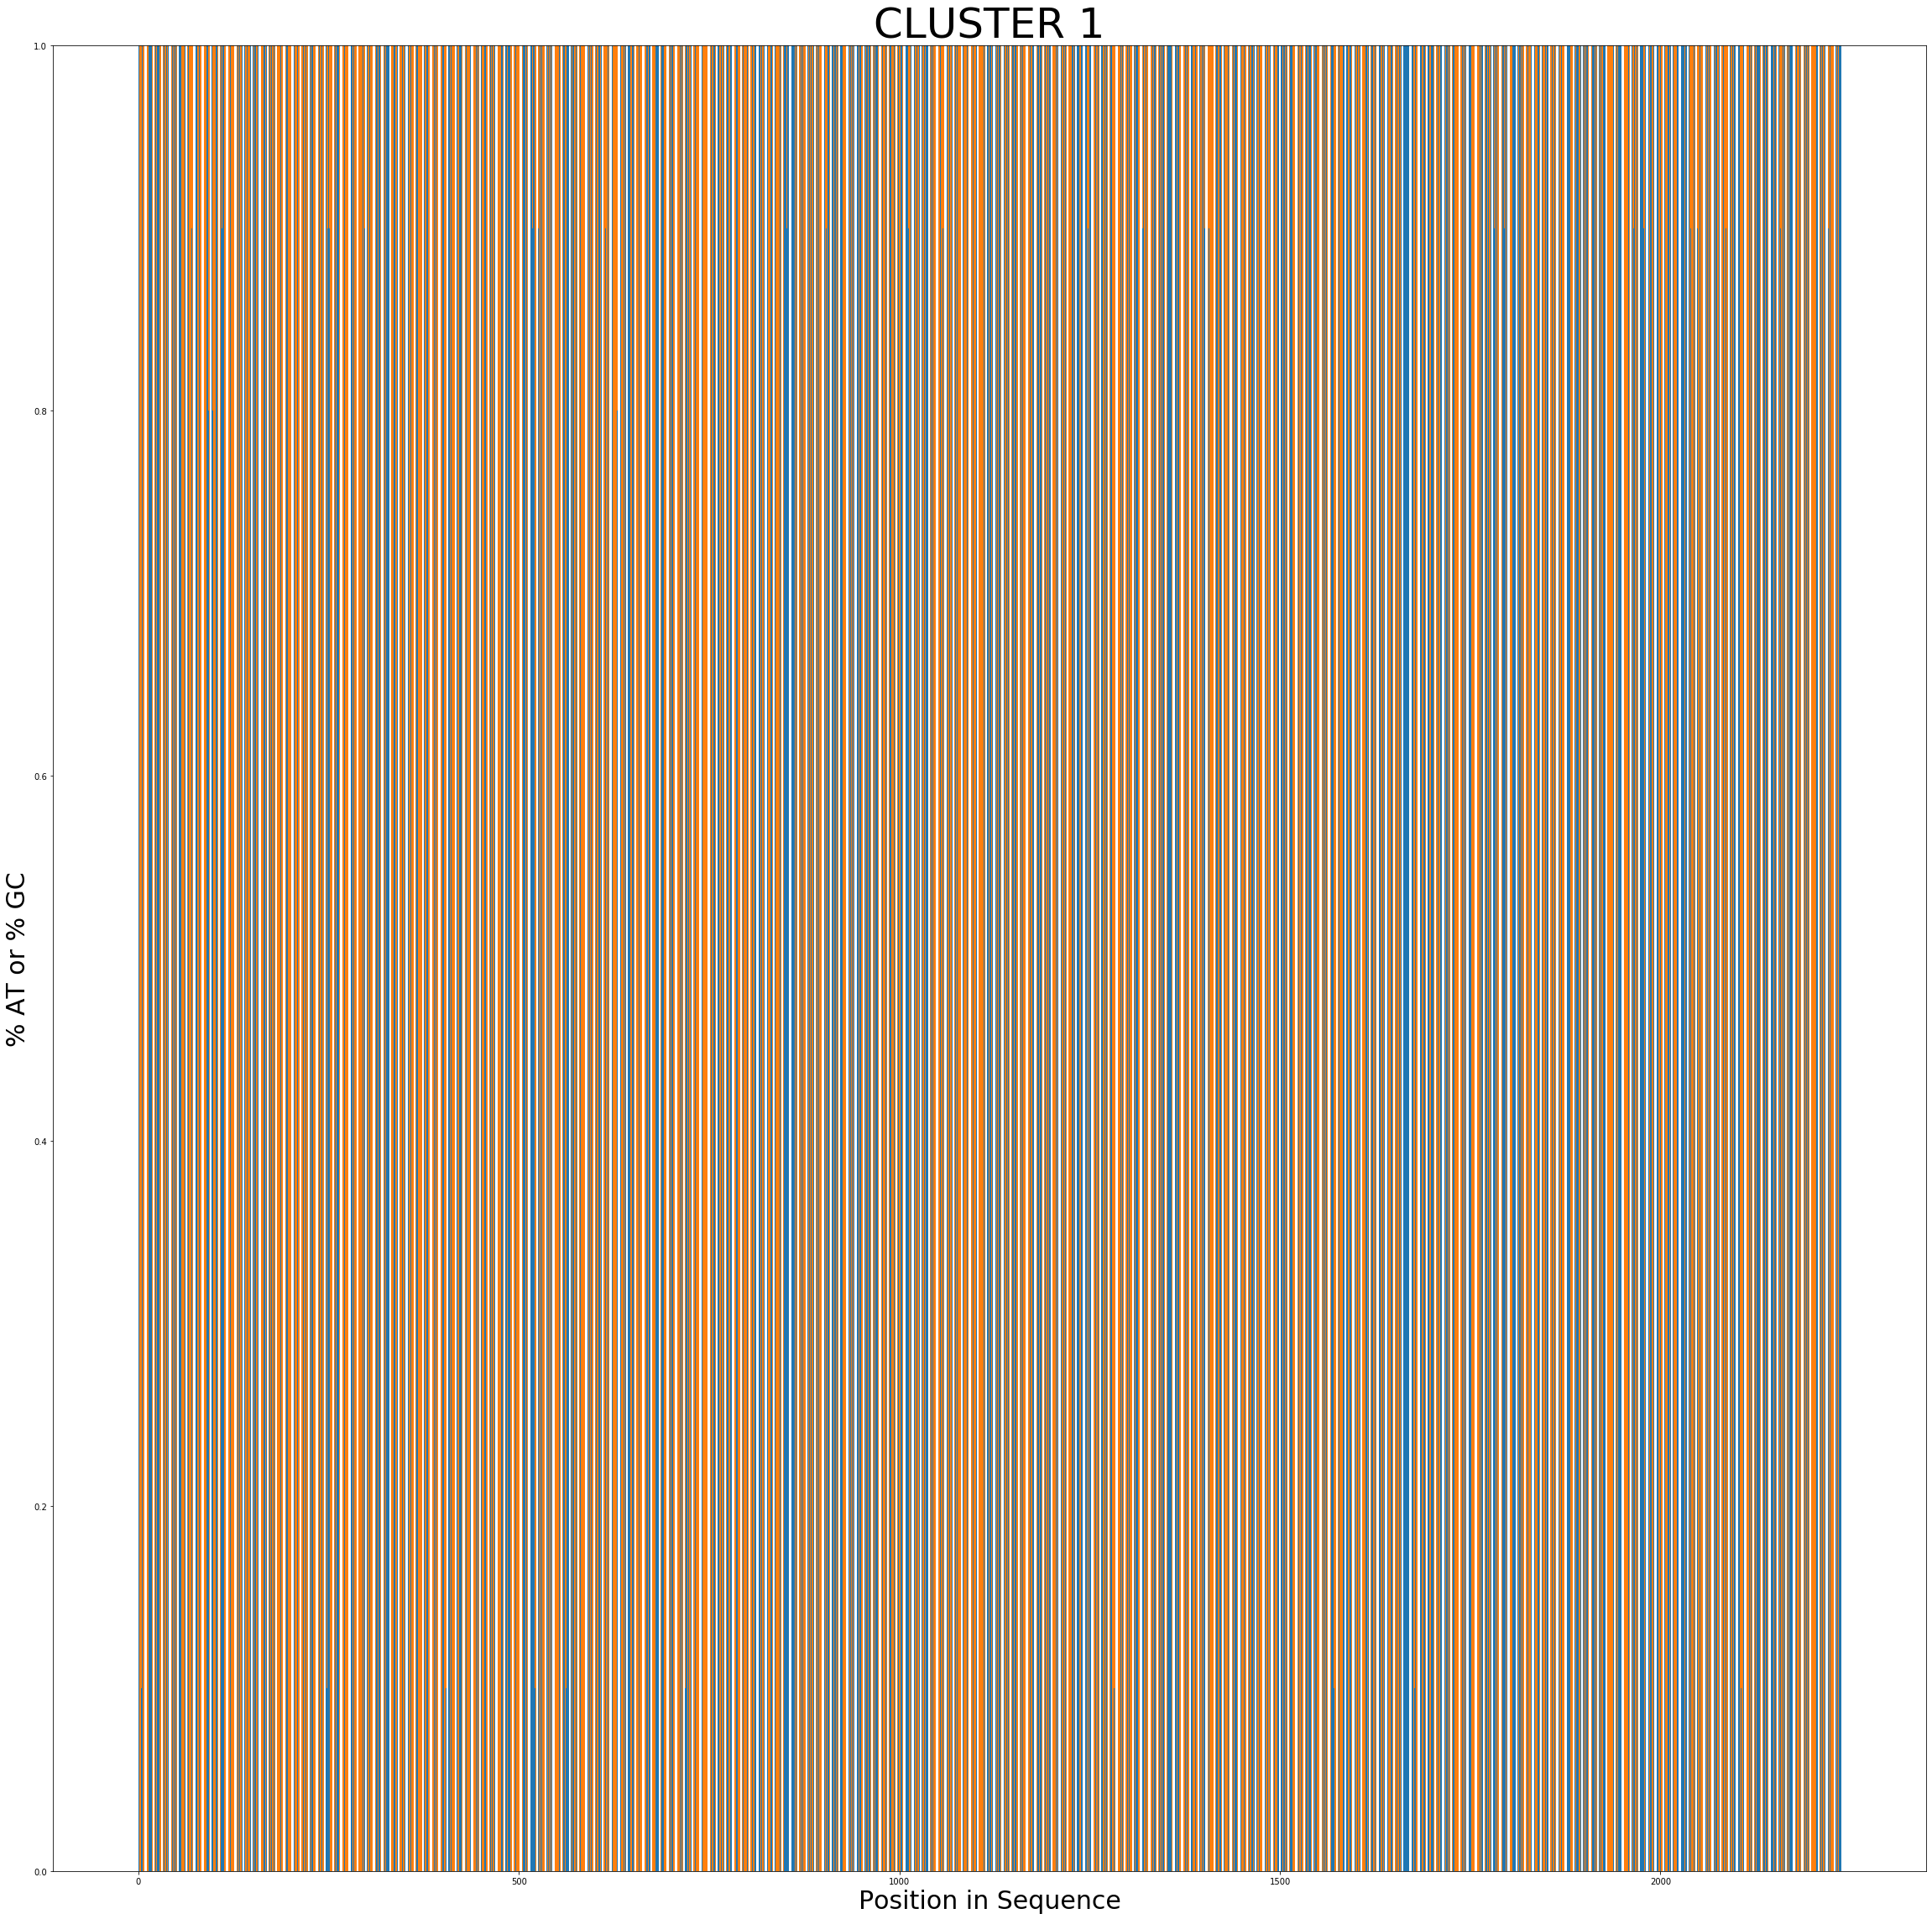

In [585]:
# OUTPUT: Displays the calculated fractions of AT or GC for the full sequence for CLUSTER 1
plt.rcParams['figure.figsize'] = [40, 40]
plt.bar(range(len(GC_vs_AT[1][1])), GC_vs_AT[1][1], 0.75)
plt.bar(range(len(GC_vs_AT[1][0])), GC_vs_AT[1][0], 0.75, bottom = GC_vs_AT[1][1])
plt.xlabel("Position in Sequence", fontsize = 30)
plt.ylabel("% AT or % GC", fontsize = 30)
plt.title('CLUSTER 1', fontsize = 50)
plt.show()

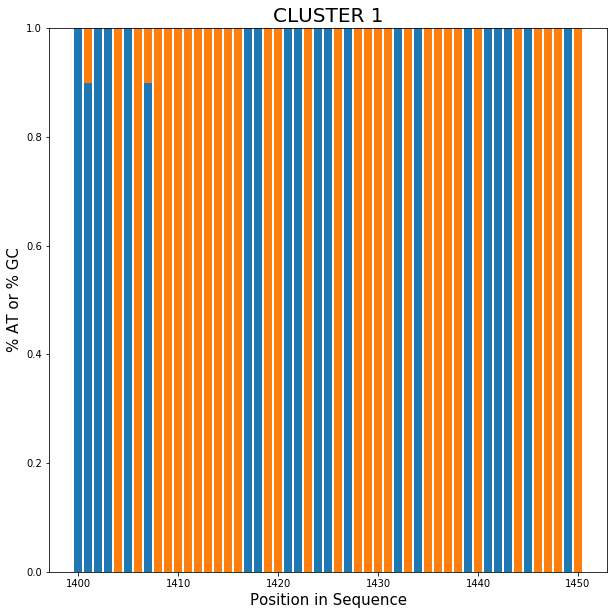

In [586]:
# OUTPUT: Displays the calculated fractions of AT or GC for positions 1400 to 1451 for CLUSTER 1
plt.rcParams['figure.figsize'] = [10, 10]
plt.bar(range(1400,1451), GC_vs_AT[1][1][1400:1451], 0.75)
plt.bar(range(1400,1451), GC_vs_AT[1][0][1400:1451], 0.75, bottom = GC_vs_AT[1][1][1400:1451])
plt.xlabel("Position in Sequence", fontsize = 15)
plt.ylabel("% AT or % GC", fontsize = 15)
plt.title('CLUSTER 1', fontsize = 20)
plt.show()

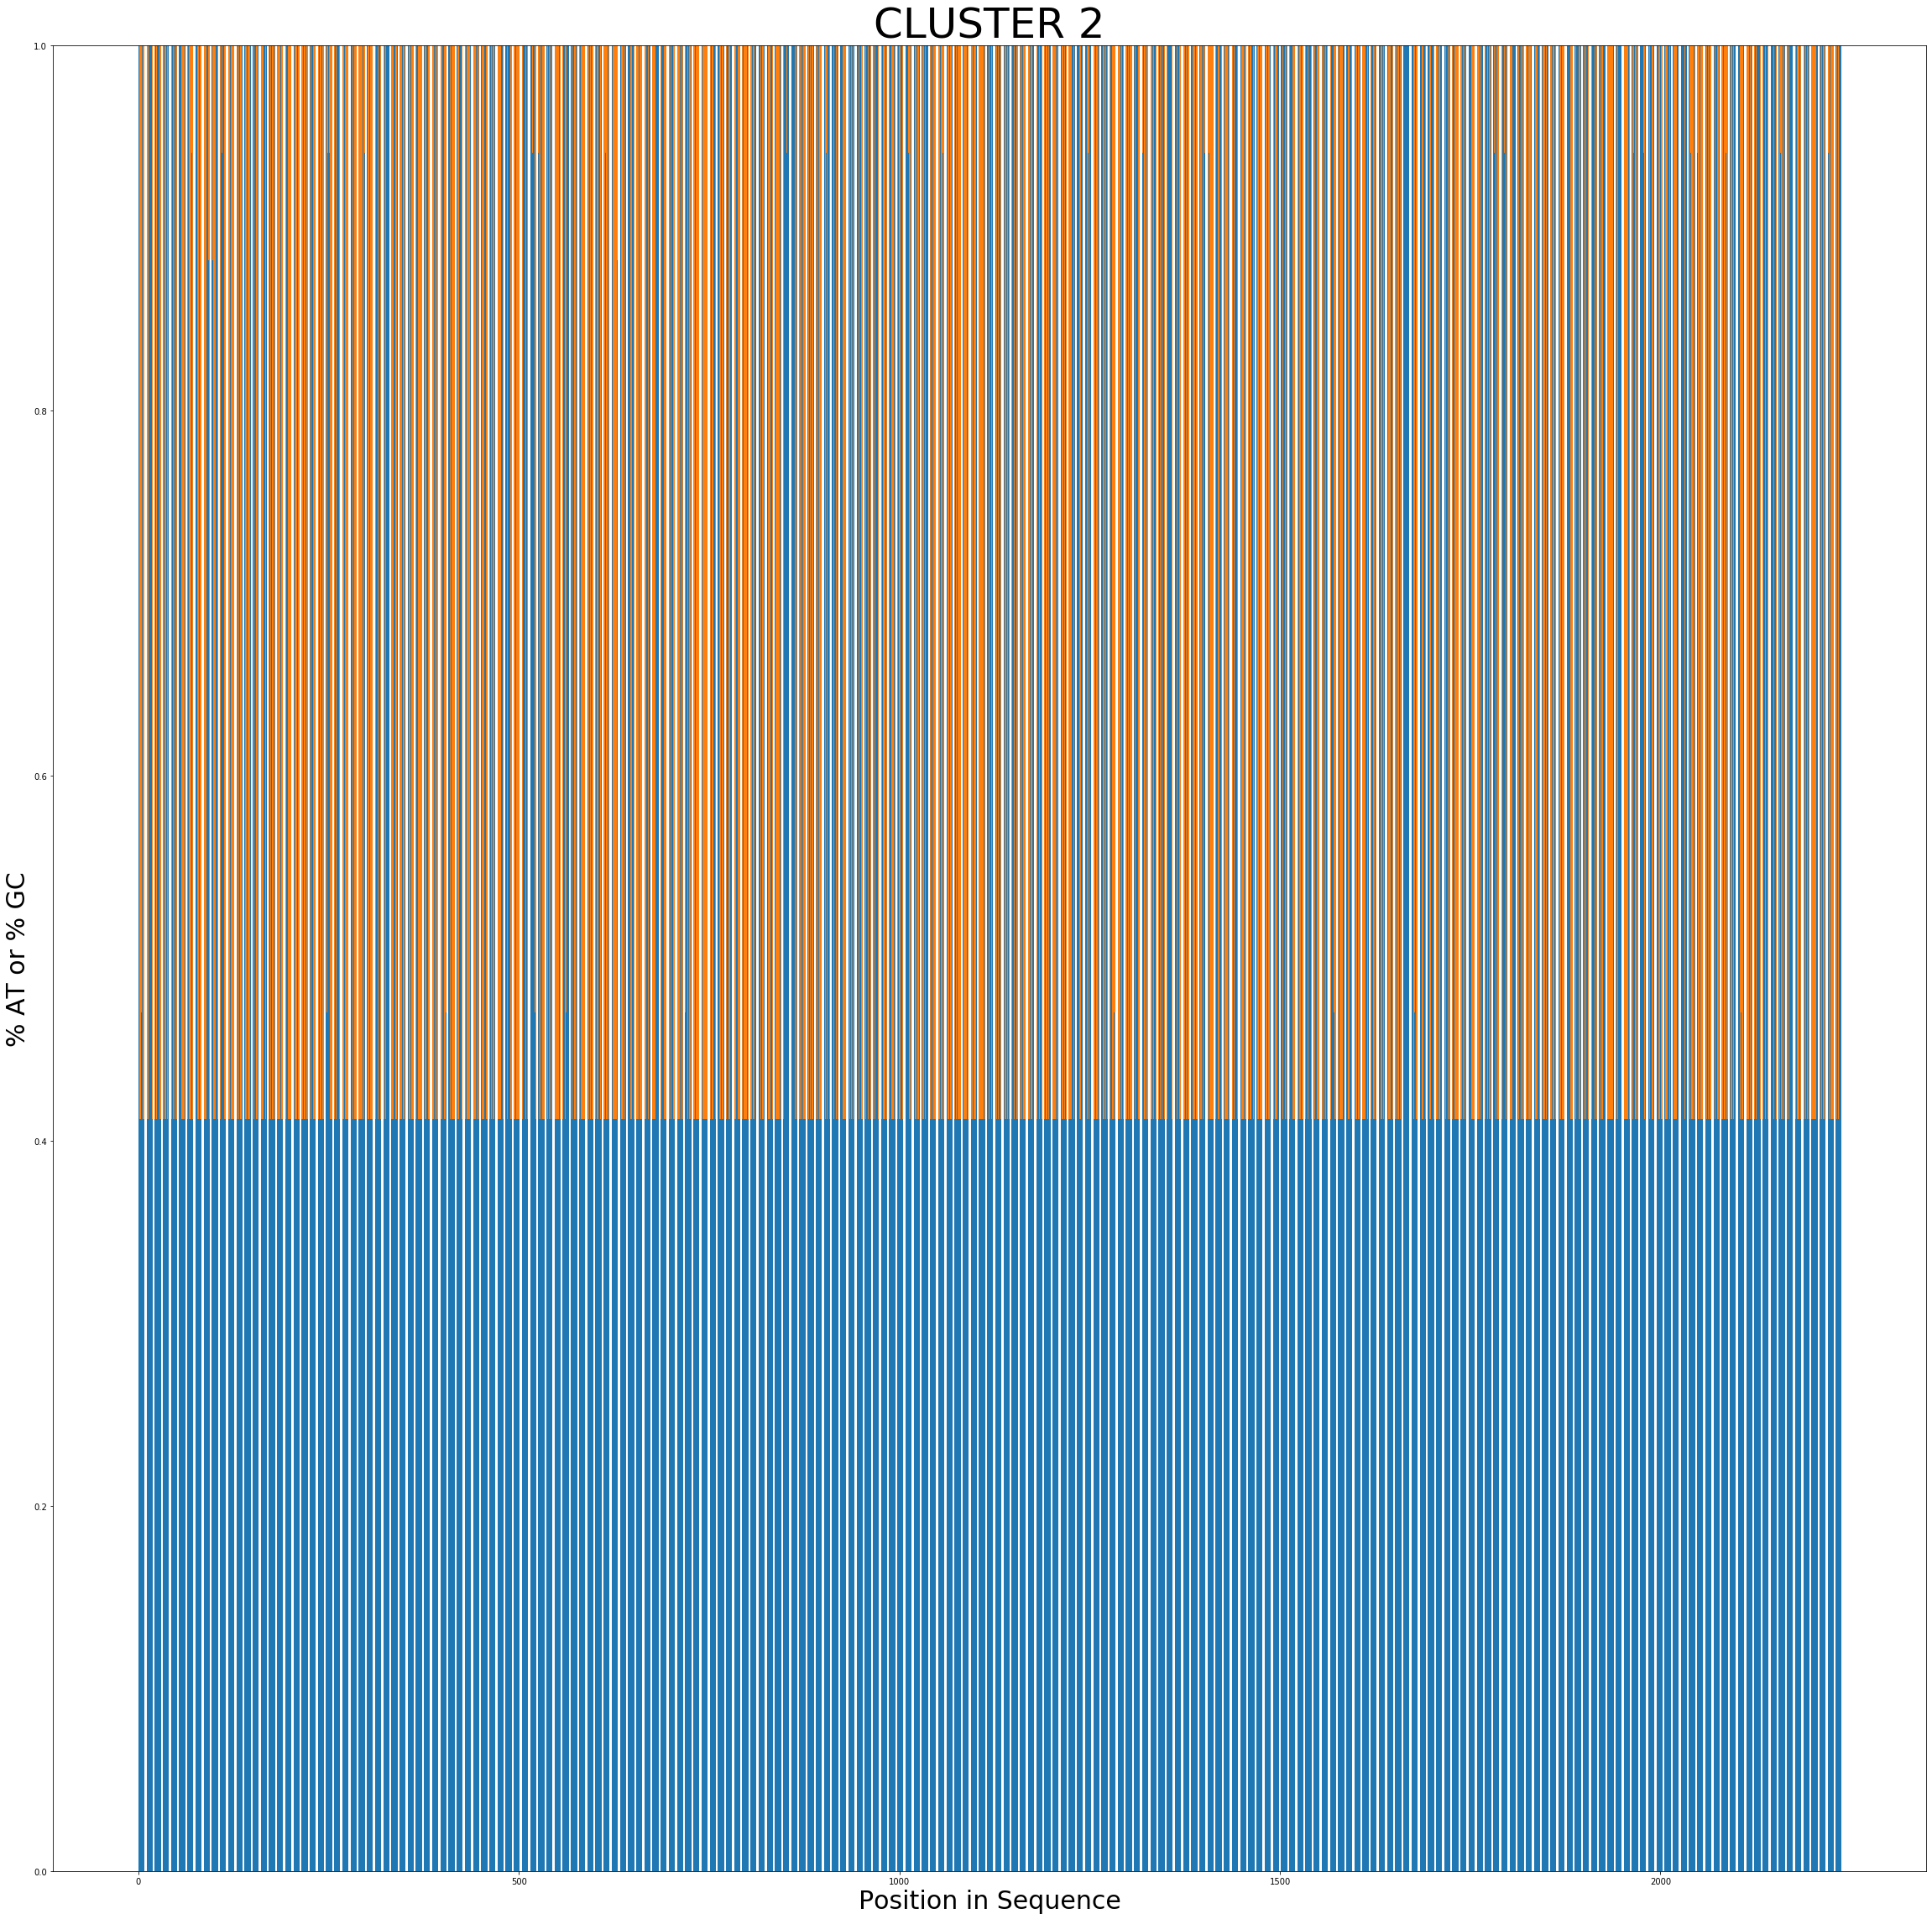

In [587]:
# OUTPUT: Displays the calculated fractions of AT or GC for the full sequence for CLUSTER 2
plt.rcParams['figure.figsize'] = [40, 40]
plt.bar(range(len(GC_vs_AT[2][1])), GC_vs_AT[2][1], 0.75)
plt.bar(range(len(GC_vs_AT[2][0])), GC_vs_AT[2][0], 0.75, bottom = GC_vs_AT[2][1])
plt.xlabel("Position in Sequence", fontsize = 30)
plt.ylabel("% AT or % GC", fontsize = 30)
plt.title('CLUSTER 2', fontsize = 50)
plt.show()

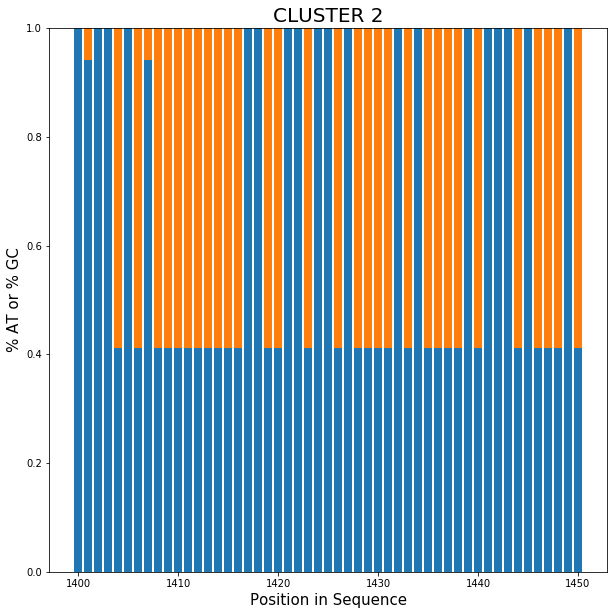

In [588]:
# OUTPUT: Displays the calculated fractions of AT or GC for positions 1400 to 1451 for CLUSTER 2
plt.rcParams['figure.figsize'] = [10, 10]
plt.bar(range(1400,1451), GC_vs_AT[2][1][1400:1451], 0.75)
plt.bar(range(1400,1451), GC_vs_AT[2][0][1400:1451], 0.75, bottom = GC_vs_AT[2][1][1400:1451])
plt.xlabel("Position in Sequence", fontsize = 15)
plt.ylabel("% AT or % GC", fontsize = 15)
plt.title('CLUSTER 2', fontsize = 20)
plt.show()

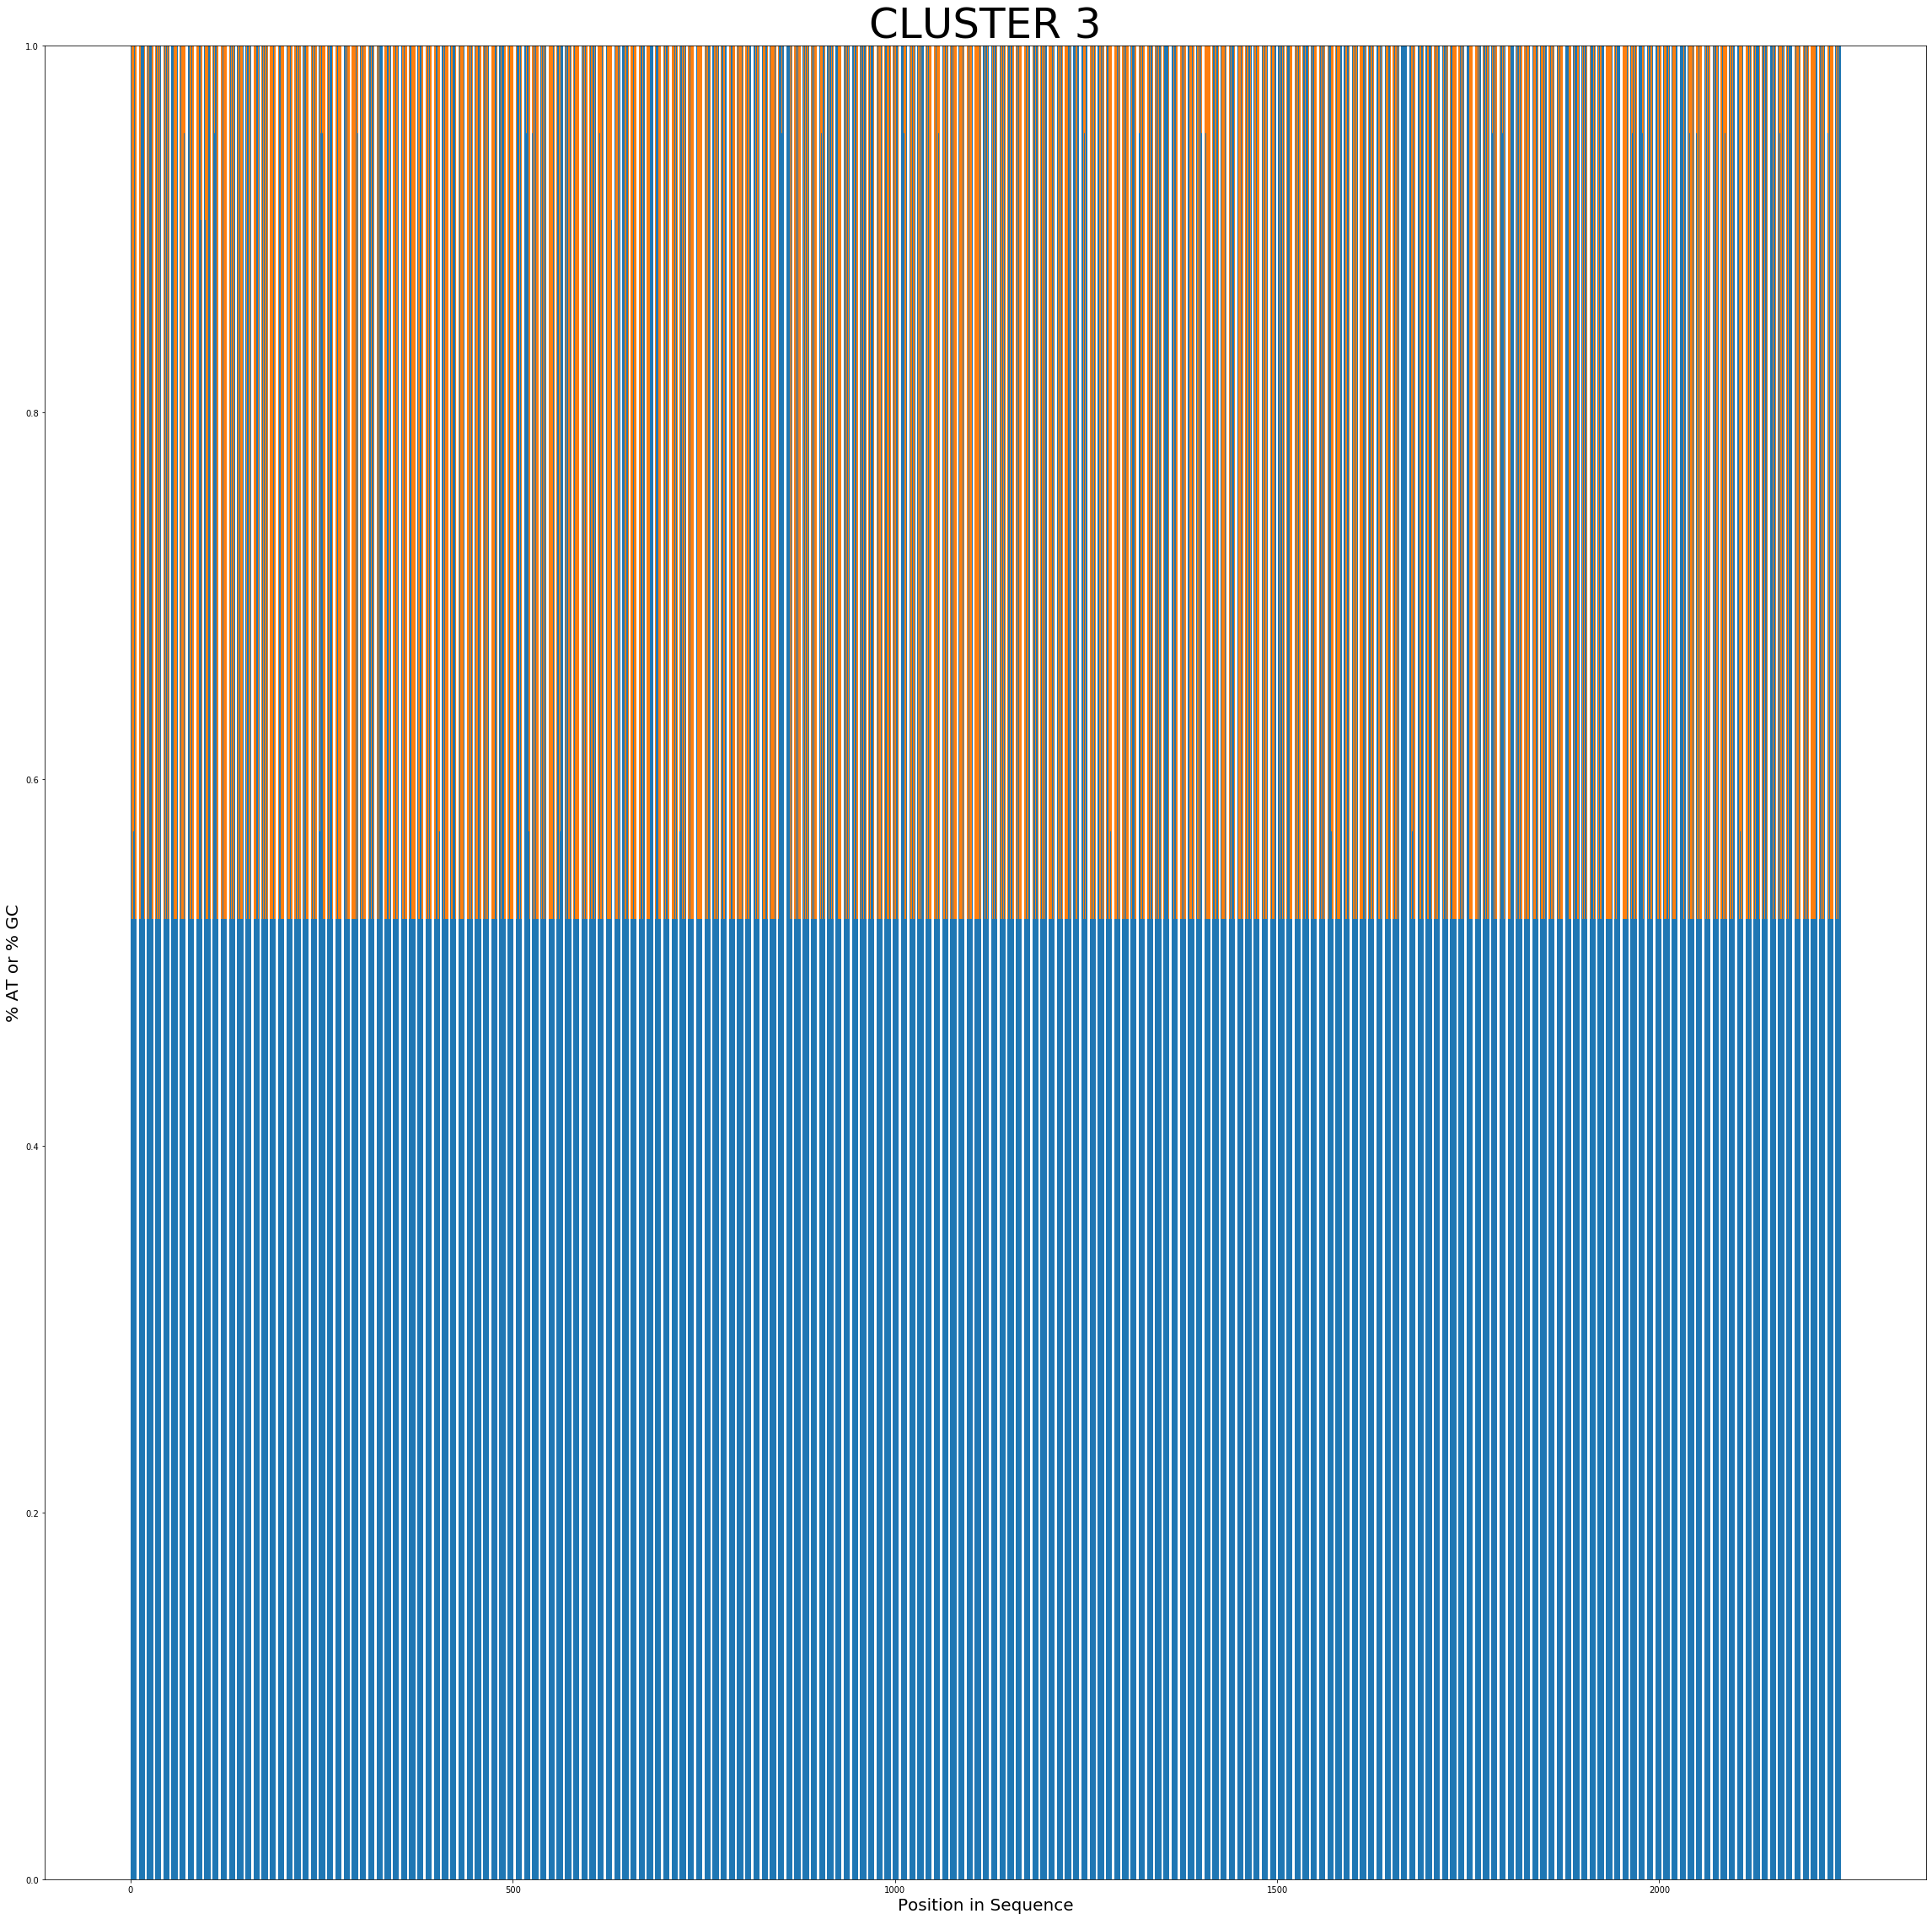

In [589]:
# OUTPUT: Displays the calculated fractions of AT or GC for the full sequence for CLUSTER 3
plt.rcParams['figure.figsize'] = [40, 40]
plt.bar(range(len(GC_vs_AT[3][1])), GC_vs_AT[3][1], 0.75)
plt.bar(range(len(GC_vs_AT[3][0])), GC_vs_AT[3][0], 0.75, bottom = GC_vs_AT[3][1])
plt.xlabel("Position in Sequence", fontsize = 20)
plt.ylabel("% AT or % GC", fontsize = 20)
plt.title('CLUSTER 3', fontsize = 50)
plt.show()

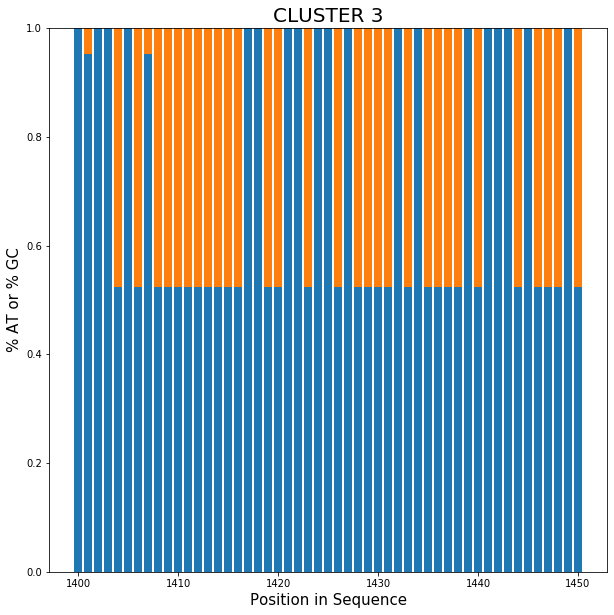

In [590]:
# OUTPUT: Displays the calculated fractions of AT or GC for positions 1400 to 1451 for CLUSTER 3
plt.rcParams['figure.figsize'] = [10, 10]
plt.bar(range(1400,1451), GC_vs_AT[3][1][1400:1451], 0.75)
plt.bar(range(1400,1451), GC_vs_AT[3][0][1400:1451], 0.75, bottom = GC_vs_AT[3][1][1400:1451])
plt.xlabel("Position in Sequence", fontsize = 15)
plt.ylabel("% AT or % GC", fontsize = 15)
plt.title('CLUSTER 3', fontsize = 20)
plt.show()

***
In this final section of code, a boxplot is made to analyze the sequence lengths of all the specimen in each cluster, based off the data from fasta file "seqs.fasta".

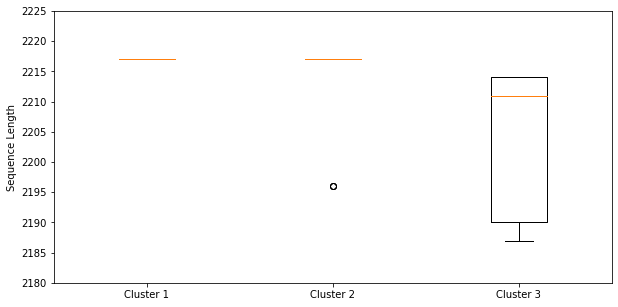

In [570]:
# PROCESSING: Stores the sequence lengths of each cluster
list1 = []
for record.id in cluster_map[1]:
    list1.append(len(record.id.seq))

list2 = []
for record.id in cluster_map[2]:
    list2.append(len(record.id.seq))

list3 = []
for record.id in cluster_map[3]:
    list3.append(len(record.id.seq))

data = [list1,list2,list3]

# OUTPUT: Displays the Boxplot of the sequence lengths of each cluster
plt.rcParams['figure.figsize'] = [10, 5]
plt.ylim(2180,2225)
plt.ylabel("Sequence Length")
line_out = plt.boxplot(data, labels = ["Cluster 1", "Cluster 2", "Cluster 3"])

***
Cluster 1 had all the sequences of the same length, 2217 bp. <br>
Cluster 2 had almost all of its sequences of the same length , 2217 bp. However, it had two outliers of length 2196 bp. <br>
Cluster 3 had a lower average of sequence length (approx. 2211 bp). It has a maximum of 2214 bp and a minimum of 2187 bp. <br>